In [3]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_dataviz_final.xlsx")
allocine.head()

ID              titre     titre_original  \
0  270572              Petta              PETTA   
1  293378          Les SEGPA          LES SEGPA   
2  246253  L'Amant D'un Jour  L'AMANT D'UN JOUR   
3  280918    L'Homme parfait    L'HOMME PARFAIT   
4  310521          Testament          TESTAMENT   

                                             acteurs          acteur_1  \
0  Rajinikanth, Vijay Sethupathi, Nawazuddin Sidd...       Rajinikanth   
1  Ichem Bougheraba, Walid Ben Amar, Arriles Amra...  Ichem Bougheraba   
2  Eric Caravaca, Esther Garrel, Louise Chevillot...     Eric Caravaca   
3  Didier Bourdon, Pierre-Francois Martin-Laval, ...    Didier Bourdon   
4  Remy Girard, Sophie Lorain, Marie-Mai, Guylain...       Remy Girard   

                        acteur_2              acteur_3            acteur_4  \
0               Vijay Sethupathi   Nawazuddin Siddiqui         Bobby Simha   
1                 Walid Ben Amar        Arriles Amrani         Kader Bueno   
2                  Esther Garrel    Louise Chevillotte         Felix Kysyl   
3   Pierre-Francois Martin-Laval      Valerie Karsenti   Philippe Duquesne   
4                  Sophie Lorain             Marie-Mai   Guylaine Tremblay   

                        realisateur            real_1  ...      date2   annee  \
0                  Karthik Subbaraj  Karthik Subbaraj  ... 2019-01-10  2019.0   
1  Ali Bougheraba, Hakim Bougheraba    Ali Bougheraba  ... 2022-04-20  2022.0   
2                   Philippe Garrel   Philippe Garrel  ... 2017-05-31  2017.0   
3                  Xavier Durringer  Xavier Durringer  ... 2022-06-22  2022.0   
4                      Denys Arcand      Denys Arcand  ... 2023-11-22  2023.0   

  jour_split mois_split annee_split actors_score directors_score  \
0       10.0        1.0      2019.0     0.455621        1.125524   
1       20.0        4.0      2022.0     0.135466        1.055201   
2       31.0        5.0      2017.0     0.559548        1.983822   
3       22.0        6.0      2022.0     0.632422        1.379569   
4       22.0       11.0      2023.0     0.459392        1.840676   

  scenaristes_score distrib_score  budget_dollars  
0          0.141740       0.01495             1.0  
1          0.000000       0.01473             1.0  
2          0.978035       0.00998             2.0  
3          0.437381       0.01664             4.0  
4          0.905899       0.02466             6.0  

[5 rows x 39 columns]

In [4]:
# Vérification du nombre de valeurs manquantes
allocine.isna().sum()

ID                            0
titre                         0
titre_original                0
acteurs                     372
acteur_1                    372
acteur_2                    439
acteur_3                    492
acteur_4                    556
realisateur                   0
real_1                        0
real_2                     5815
genres                        0
genre_1                       0
genre_2                    3110
genre_3                    5237
scenariste                  137
scen_1                      137
scen_2                     2033
scen_3                     3970
duree                         0
note_presse                   0
note_spectateurs            175
pays                          0
distributeur                 25
distrib_1                    25
premiere_semaine_france       0
cumul_france                  0
premiere_semaine_US        4623
cumul_US                   4623
date2                         0
annee                         0
jour_spl

In [5]:
# Pour l'analyse, on définit un dataframe sans valeur manquante pour "note_presse" et "note_spectateurs"
allocine_notes = allocine.dropna(subset=["note_spectateurs"]).reset_index(drop=True)
allocine_notes.isna().sum()

ID                            0
titre                         0
titre_original                0
acteurs                     364
acteur_1                    364
acteur_2                    431
acteur_3                    482
acteur_4                    534
realisateur                   0
real_1                        0
real_2                     5651
genres                        0
genre_1                       0
genre_2                    3035
genre_3                    5091
scenariste                  107
scen_1                      107
scen_2                     1929
scen_3                     3829
duree                         0
note_presse                   0
note_spectateurs              0
pays                          0
distributeur                 18
distrib_1                    18
premiere_semaine_france       0
cumul_france                  0
premiere_semaine_US        4477
cumul_US                   4477
date2                         0
annee                         0
jour_spl

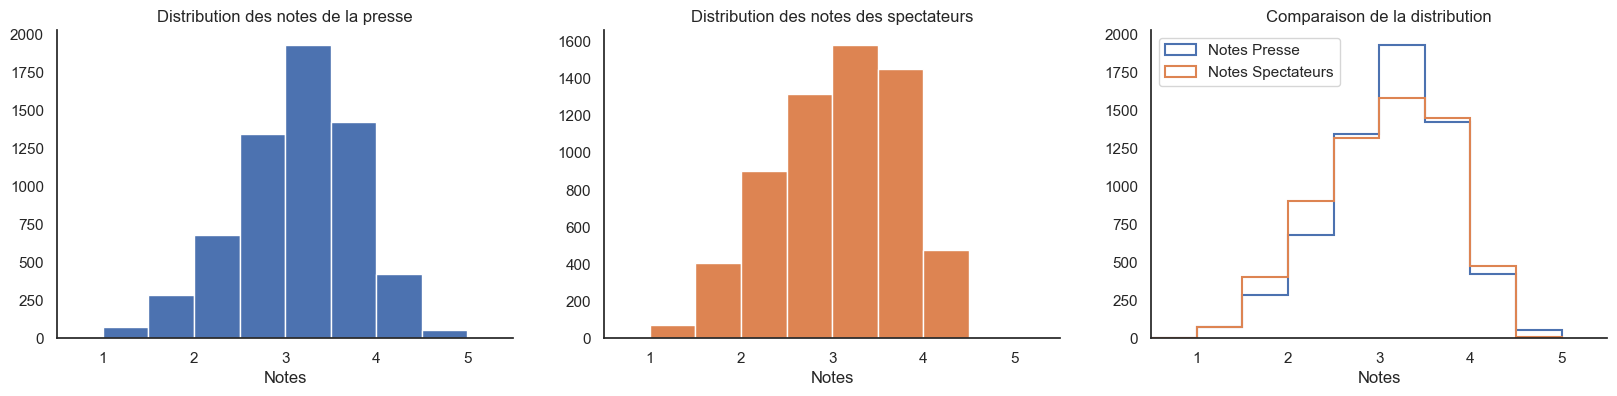

In [7]:
# Distribution des notes spectateurs et presse

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="deep")

fig, axes = plt.subplots(1, 3, figsize = (20,4))
ax1, ax2, ax3 = fig.axes

ax1.set_xlim([0.5,5.5])
ax2.set_xlim([0.5,5.5])
ax3.set_xlim([0.5,5.5])


ax1.hist(allocine_notes["note_presse"], bins = 10, range = (0,5), color='C0') # bin range = 1
ax1.set_title('Distribution des notes de la presse')
ax1.set_xlabel('Notes')

ax2.hist(allocine_notes["note_spectateurs"], bins = 10, range = (0,5), color='C1') # bin range = 1
ax2.set_title('Distribution des notes des spectateurs')
ax2.set_xlabel('Notes')

ax3.hist(allocine_notes["note_presse"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Notes Presse', color='C0')
ax3.hist(allocine_notes["note_spectateurs"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Notes Spectateurs', color='C1')
ax3.legend(loc = 'upper left')
ax3.set_title('Comparaison de la distribution')
ax3.set_xlabel('Notes')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

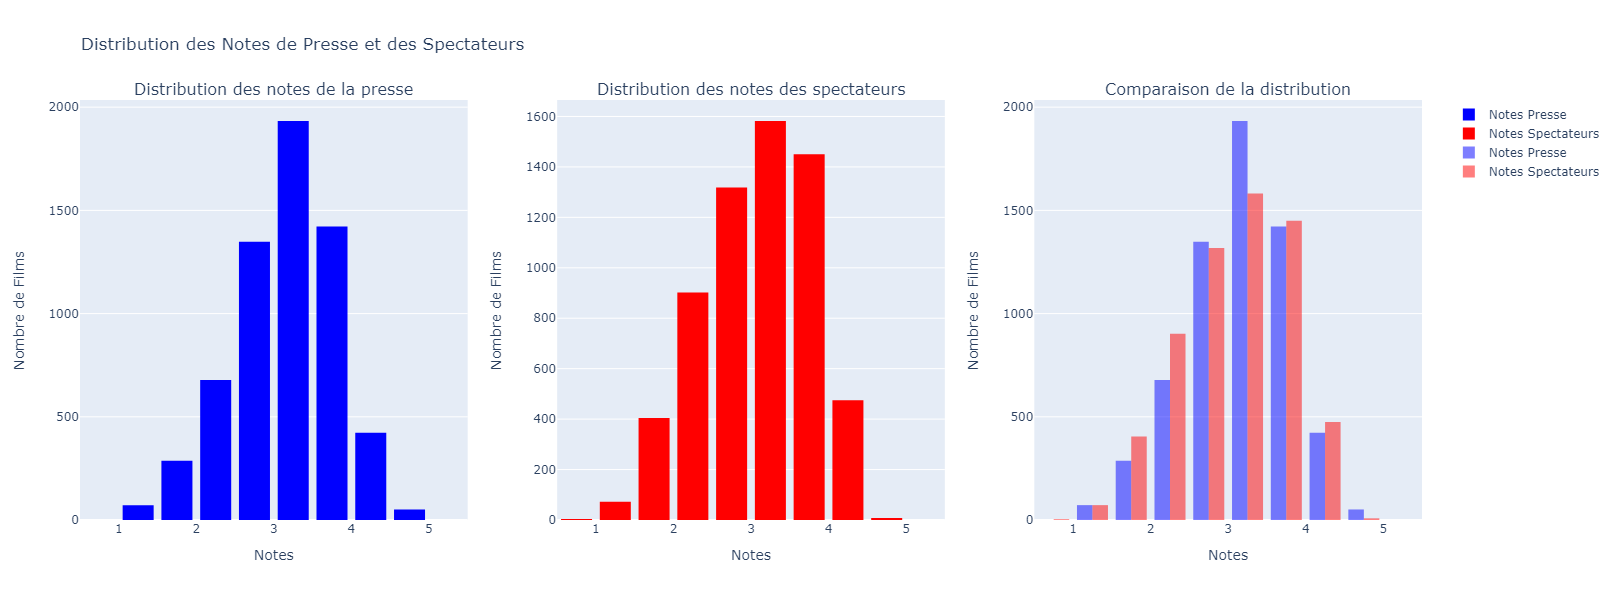

In [8]:
# Distribution des notes spectateurs et presse avec plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Création d'une figure avec des subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Distribution des notes de la presse",
                                                    "Distribution des notes des spectateurs",
                                                    "Comparaison de la distribution"))

# Histogramme pour les notes de la presse
fig.add_trace(
    go.Histogram(x=allocine_notes['note_presse'], nbinsx=10, xbins=dict(start=0, end=5), 
                 marker_color='blue', name='Notes Presse'),
    row=1, col=1
)

# Histogramme pour les notes des spectateurs
fig.add_trace(
    go.Histogram(x=allocine_notes['note_spectateurs'], nbinsx=10, xbins=dict(start=0, end=5),
                 marker_color='red', name='Notes Spectateurs'),
    row=1, col=2
)

# Histogrammes superposés pour la comparaison
fig.add_trace(
    go.Histogram(x=allocine_notes['note_presse'], nbinsx=10, xbins=dict(start=0, end=5),
                 marker_color='blue', name='Notes Presse', opacity=0.5),
    row=1, col=3
)
fig.add_trace(
    go.Histogram(x=allocine_notes['note_spectateurs'], nbinsx=10, xbins=dict(start=0, end=5),
                 marker_color='red', name='Notes Spectateurs', opacity=0.5),
    row=1, col=3
)

# Mise à jour des layouts pour chaque axe
fig.update_xaxes(title_text="Notes", range=[0.5, 5.5], row=1, col=1)
fig.update_xaxes(title_text="Notes", range=[0.5, 5.5], row=1, col=2)
fig.update_xaxes(title_text="Notes", range=[0.5, 5.5], row=1, col=3)

fig.update_yaxes(title_text="Nombre de Films", row=1, col=1)
fig.update_yaxes(title_text="Nombre de Films", row=1, col=2)
fig.update_yaxes(title_text="Nombre de Films", row=1, col=3)

# Mise à jour de l'apparence générale du graphique
fig.update_layout(title_text="Distribution des Notes de Presse et des Spectateurs",
                  height=600, width=1400, showlegend=True)

# Afficher le graphique
fig.show()

In [18]:
# Distribution des notes spectateurs et presse avec bokeh

from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category10
import numpy as np

output_notebook()

# Calcul des bins pour les histogrammes
bins = np.linspace(0, 5, 11)  # 10 bins de 0 à 5
press_hist, press_edges = np.histogram(allocine_notes['note_presse'], bins=bins)
spect_hist, spect_edges = np.histogram(allocine_notes['note_spectateurs'], bins=bins)

# Préparation des données pour Bokeh
press_source = ColumnDataSource(data=dict(
   top=press_hist,
    left=[x - 0.05 for x in press_edges[:-1]],
    right=[x - 0.05 for x in press_edges[1:]],
    press_count=press_hist,
    press_note=[f"{left:.1f} - {right:.1f}" for left, right in zip(press_edges[:-1], press_edges[1:])]
))
spect_source = ColumnDataSource(data=dict(
    top=spect_hist,
    left=[x + 0.05 for x in spect_edges[:-1]],  # Décalage à droite
    right=[x + 0.05 for x in spect_edges[1:]],
    spect_count=spect_hist,
    spect_note=[f"{left:.1f} - {right:.1f}" for left, right in zip(spect_edges[:-1], spect_edges[1:])]
))

# Création des figures
p1 = figure(title="Distribution des notes de la presse", tools="pan,wheel_zoom,reset", 
            x_range=(0, 5.5), background_fill_color="#fafafa")
p2 = figure(title="Distribution des notes des spectateurs", tools="pan,wheel_zoom,reset", 
            x_range=(0, 5.5), background_fill_color="#fafafa")
p3 = figure(title="Comparaison de la distribution", tools="pan,wheel_zoom,reset", 
            x_range=(0, 5.5), background_fill_color="#fafafa")

# Ajout des histogrammes avec HoverTool pour chaque graphique
hover_p1 = HoverTool(tooltips=[("Note Range", "@press_note"), ("Nombre de Films", "@press_count")])
hover_p2 = HoverTool(tooltips=[("Note Range", "@spect_note"), ("Nombre de Films", "@spect_count")])

p1.add_tools(hover_p1)
p2.add_tools(hover_p2)

p1.quad(bottom=0, top='top', left='left', right='right', source=press_source,
        fill_color=Category10[3][0], line_color="white", alpha=0.5)
p2.quad(bottom=0, top='top', left='left', right='right', source=spect_source,
        fill_color=Category10[3][1], line_color="white", alpha=0.5)

# Ajout et configuration des HoverTools pour le graphique comparatif
press_hover = HoverTool(tooltips=[("Note Range", "@press_note"), ("Nombre de Films", "@press_count")])
spect_hover = HoverTool(tooltips=[("Note Range", "@spect_note"), ("Nombre de Films", "@spect_count")])

p3.add_tools(press_hover, spect_hover)

press_glyph = p3.quad(bottom=0, top='top', left='left', right='right', source=press_source,
                      fill_color=Category10[3][0], line_color="white", alpha=0.5)
spect_glyph = p3.quad(bottom=0, top='top', left='left', right='right', source=spect_source,
                      fill_color=Category10[3][1], line_color="white", alpha=0.7)

press_hover.renderers = [press_glyph]
spect_hover.renderers = [spect_glyph]

# Configuration des axes et de l'interface utilisateur
for p in [p1, p2, p3]:
    p.xaxis.axis_label = "Notes"
    p.yaxis.axis_label = "Nombre de Films"
    p.grid.grid_line_color="white"

# Affichage des graphiques côte à côte
show(row(p1, p2, p3))

Loading BokehJS ...

In [8]:
# Top 10 de la presse
top10_presse = allocine_notes.sort_values(by='note_presse', ascending=False).head(10)

# Top 10 des spectateurs
top10_spectateurs = allocine_notes.sort_values(by='note_spectateurs', ascending=False).head(10)

print("Top 10 de la presse :")
print(top10_presse[['titre', 'note_presse']])

print("\nTop 10 des spectateurs :")
print(top10_spectateurs[['titre', 'note_spectateurs']])

Top 10 de la presse :
                                              titre  note_presse
399           The Lodger: A Story of the London Fog          5.0
5089                            Million Dollar Baby          4.9
5087  Wallace et Gromit : le Mystere du lapin-garou          4.9
5411                                  The Fabelmans          4.9
3000                                   Rois & reine          4.8
63                        Les Funerailles des roses          4.8
4050                          La Graine et le mulet          4.7
1540                                 Une Separation          4.7
2129                                      L'esquive          4.7
6158                                    Toy Story 3          4.7

Top 10 des spectateurs :
                                   titre  note_spectateurs
1089                           Sacerdoce               4.6
5929                    Django Unchained               4.5
2335                              Demain               4.5
5

In [9]:
#NB: certains films sont des ressorties de films plus anciens, je choisis donc de ne pas en tenir compte (Ex: The Lodger: A Story of the London Fog, sorti en 1927)

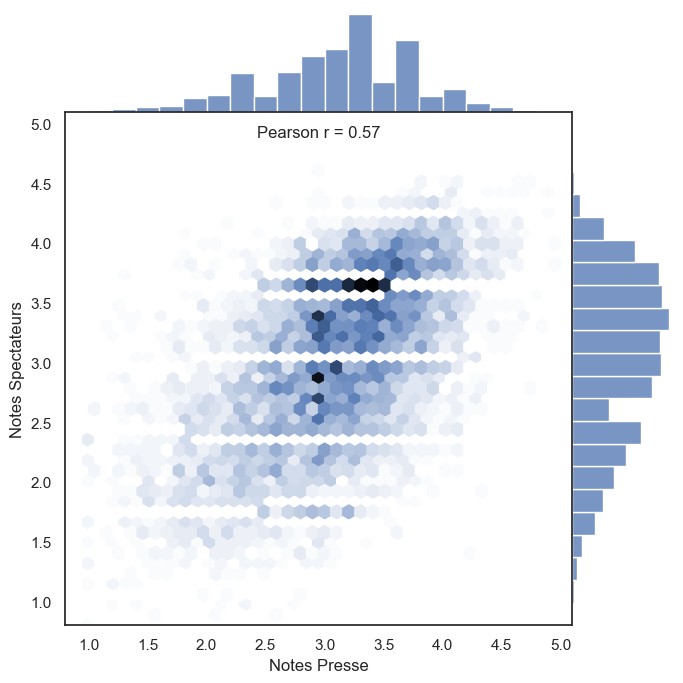

In [19]:
# Corrélation des différentes notes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

joint_plot = sns.jointplot(x="note_presse", y="note_spectateurs", 
                           data=allocine_notes, kind="hex",
                           marginal_kws=dict(bins=20),
                           xlim=(0.8, 5.1), ylim=(0.8, 5.1),
                           height=7, space=0)

# Spécifier les noms des axes
joint_plot.set_axis_labels("Notes Presse", "Notes Spectateurs")

# Calcul du coefficient de corrélation de Pearson
corr_coef, _ = pearsonr(allocine_notes['note_presse'], allocine_notes['note_spectateurs'])

# Ajout du coefficient de corrélation au graphique
joint_plot.ax_joint.annotate(f"Pearson r = {corr_coef:.2f}", xy=(0.5, 0.95), xycoords='axes fraction', ha='center', fontsize=12)

# Afficher le graphique
plt.show()

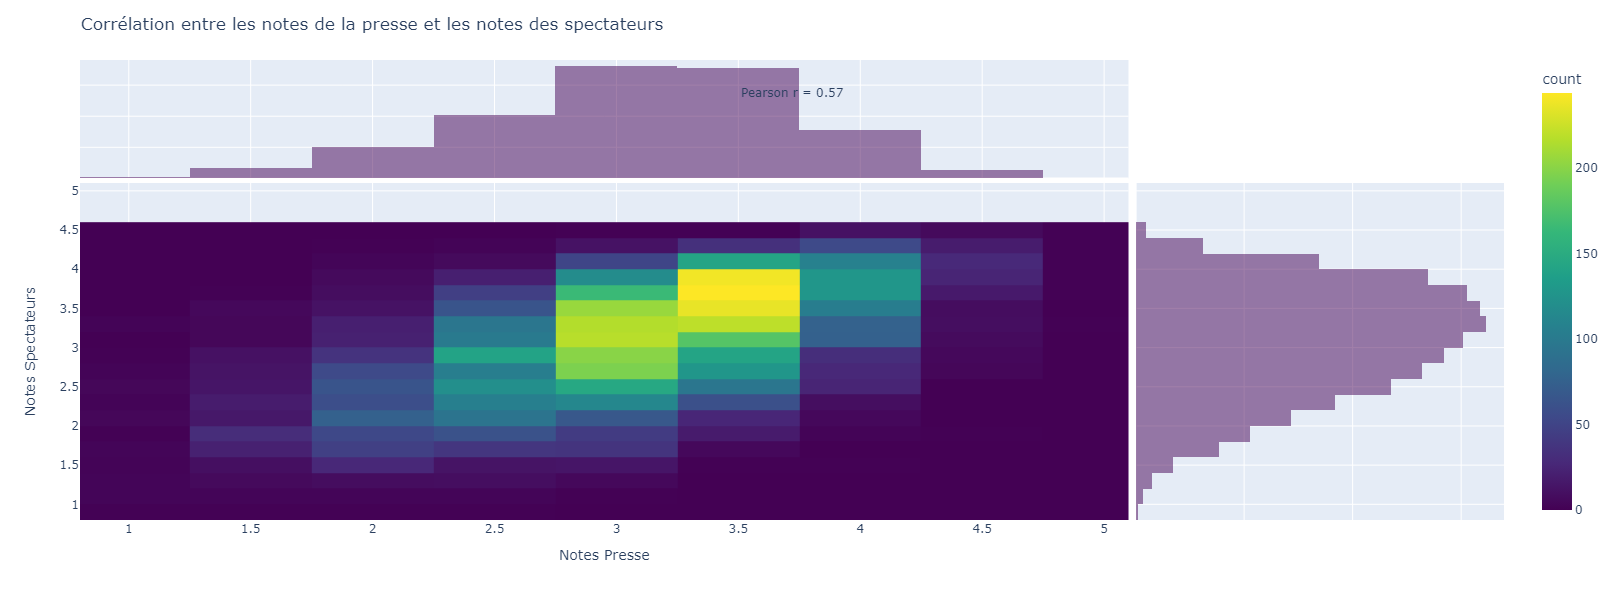

In [20]:
# Corrélation des différentes notes avec plotly

import plotly.express as px
from scipy.stats import pearsonr

# Calcul du coefficient de corrélation de Pearson
corr_coef, _ = pearsonr(allocine_notes['note_presse'], allocine_notes['note_spectateurs'])

# Création du graphique hexbin
fig = px.density_heatmap(allocine_notes, x='note_presse', y='note_spectateurs', 
                         nbinsx=20, nbinsy=20, 
                         range_x=[0.8, 5.1], range_y=[0.8, 5.1],
                         marginal_x='histogram', marginal_y='histogram',
                         color_continuous_scale=px.colors.sequential.Viridis)  # Mise à jour de la spécification de la couleur

# Ajout de l'annotation pour le coefficient de corrélation
fig.add_annotation(
    x=0.5, y=0.95,
    xref="paper", yref="paper",
    text=f"Pearson r = {corr_coef:.2f}",
    showarrow=False,
    font=dict(size=12),
    align="center"
)

# Spécifier les noms des axes
fig.update_layout(
    title="Corrélation entre les notes de la presse et les notes des spectateurs",
    xaxis_title="Notes Presse",
    yaxis_title="Notes Spectateurs",
    height=600
)

# Afficher le graphique
fig.show()

Corrélation de Pearson : 0.014665559474780302


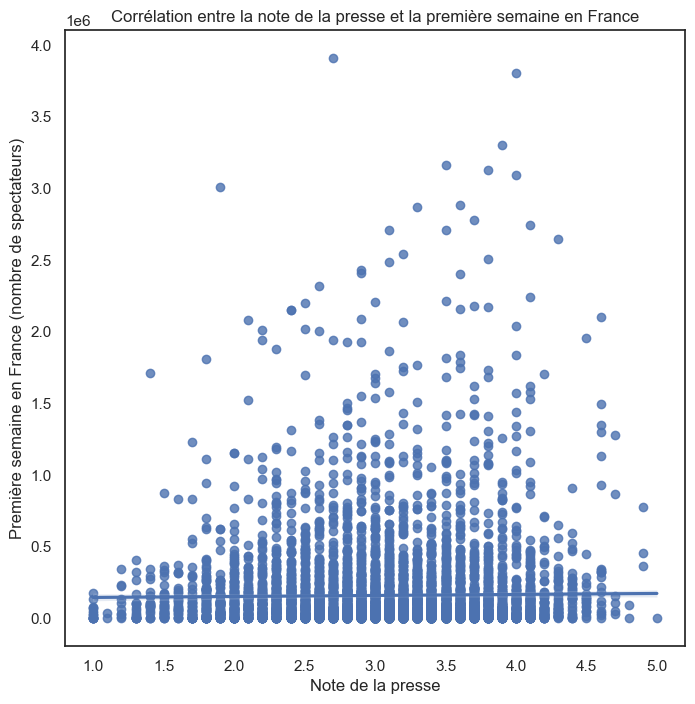

In [27]:
# Corrélation entre les notes de la presse et le nombre d'entrées en première semaine en France

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la corrélation de Pearson
correlation = allocine_notes['premiere_semaine_france'].corr(allocine_notes['note_presse'])

# Afficher le coefficient de corrélation
print(f"Corrélation de Pearson : {correlation}")

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(8, 8))

# Créer un scatter plot avec une ligne de régression
sns.regplot(x='note_presse', y='premiere_semaine_france', data=allocine_notes)

# Nom des axes
plt.xlabel('Note de la presse')
plt.ylabel('Première semaine en France (nombre de spectateurs)')

# Titre du graphique
plt.title('Corrélation entre la note de la presse et la première semaine en France')

# Afficher le graphique
plt.show();

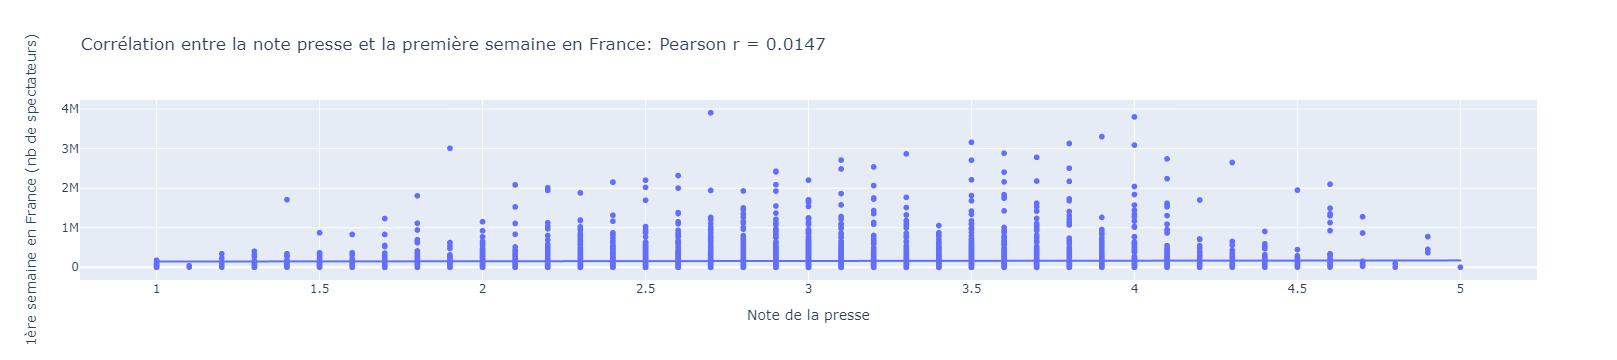

In [23]:
# Corrélation entre les notes de la presse et le nombre d'entrées en première semaine en France avec plotly

import plotly.express as px

# Calculer la corrélation de Pearson
correlation = allocine_notes['premiere_semaine_france'].corr(allocine_notes['note_presse'])

# Créer un scatter plot avec une ligne de régression
fig = px.scatter(allocine_notes, x='note_presse', y='premiere_semaine_france', trendline='ols', hover_data=['titre_original'],
                 labels={
                     'note_presse': 'Note de la presse',
                     'premiere_semaine_france': '1ère semaine en France (nb de spectateurs)'
                 },
                 title=f'Corrélation entre la note presse et la première semaine en France: Pearson r = {correlation:.4f}')

# Afficher le graphique
fig.show()

Corrélation de Pearson : 0.06200264504753522


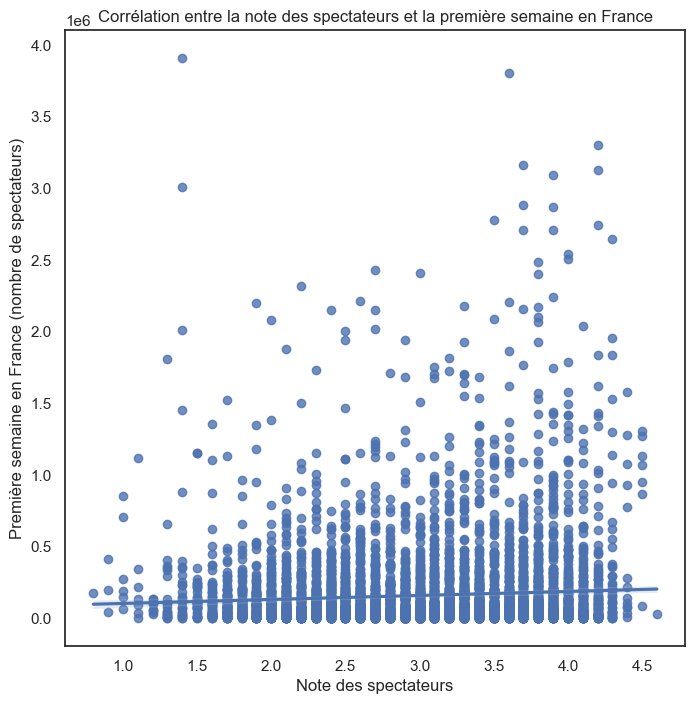

In [26]:
# Corrélation entre les notes des spectateurs et le nombre d'entrées en première semaine en France

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la corrélation de Pearson
correlation = allocine_notes['premiere_semaine_france'].corr(allocine_notes['note_spectateurs'])

# Afficher le coefficient de corrélation
print(f"Corrélation de Pearson : {correlation}")

# Créer une figure avec une taille personnalisée
plt.figure(figsize=(8, 8))

# Créer un scatter plot avec une ligne de régression
sns.regplot(x='note_spectateurs', y='premiere_semaine_france', data=allocine_notes)

# Nom des axes
plt.xlabel('Note des spectateurs')
plt.ylabel('Première semaine en France (nombre de spectateurs)')

# Titre du graphique
plt.title('Corrélation entre la note des spectateurs et la première semaine en France')

# Afficher le graphique
plt.show();

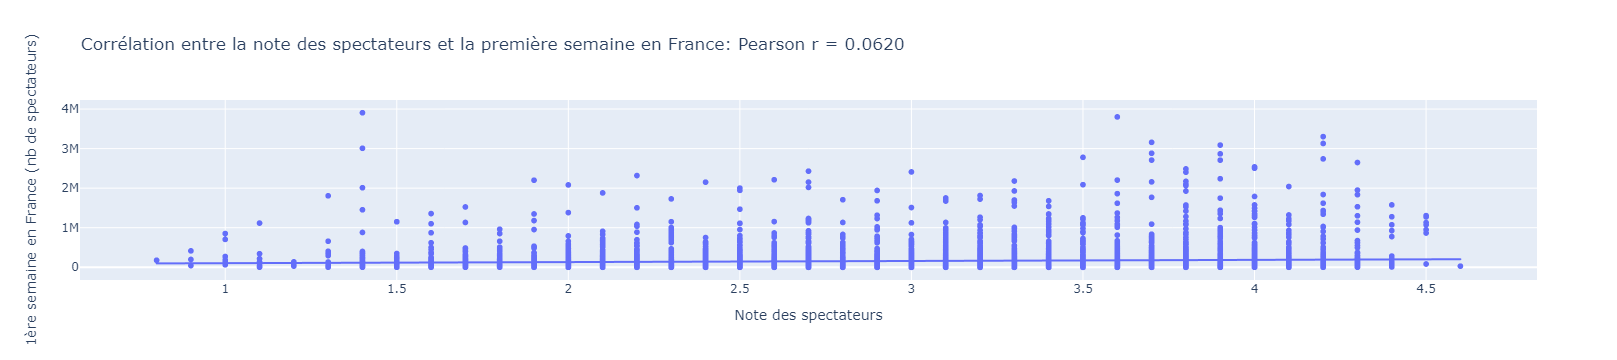

In [25]:
# Corrélation entre les notes des spectateurs et le nombre d'entrées en première semaine en France avec plotly

import plotly.express as px

# Calculer la corrélation de Pearson
correlation = allocine_notes['premiere_semaine_france'].corr(allocine_notes['note_spectateurs'])

# Créer un scatter plot avec une ligne de régression
fig = px.scatter(allocine_notes, x='note_spectateurs', y='premiere_semaine_france', trendline='ols', hover_data=['titre_original'],
                 labels={
                     'note_spectateurs': 'Note des spectateurs',
                     'premiere_semaine_france': '1ère semaine en France (nb de spectateurs)'
                 },
                 title=f'Corrélation entre la note des spectateurs et la première semaine en France: Pearson r = {correlation:.4f}')

# Afficher le graphique
fig.show()